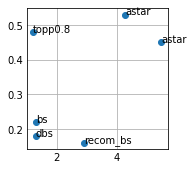

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make the data
error = [1.88,2.09,2.54,1.49,2.08,1.88]
num_path_log = [1.2,
5.5,
4.3,
1.3,
1.3,
2.9]
novel_1gram = [39,
104,
122,
42,
63,
65]
oracle_1_r2 = [0.48,
0.45,
0.53,
0.22,
0.18,
0.16] 
name = ["topp0.8",
"astar",
"astar",
"bs",
"dbs",
"recom_bs"]
# plot
fig, ax = plt.subplots()
y = oracle_1_r2
ax.scatter(num_path_log, y)

for i, txt in enumerate(name):
    ax.annotate(txt, (num_path_log[i], y[i]))

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [37]:
import csv

with open('/mnt/data1/jcxu/lattice-sum/output/table/main-xsum.csv') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',')
    read_list = list(spamreader)
    keys = read_list[0]
    d = {}
    for idx, k in enumerate(keys):
        d[idx]=k
    data = []
    for row in read_list[1:]:
        t = {}
        for idx, ele in enumerate(row):
            t[d[idx]] = ele
        data.append(t)


In [15]:
ratio_keys = ["ratio_10",'ratio_20','ratio_40','ratio_1000']
desired = ["model","name","ratio","num_path","num_node","novel_1gram","novel_2gram",'oracle_1_r1','oracle_1_r2','oracle_1_rl','sample_r1','sample_r2','sample_rl','buck_40_r1','buck_40_r2','buck_40_rl']

target_key = ["model"]+ratio_keys
print(" & ".join(target_key))
for d in data:
    outputs = []
    for des in target_key:
        v = d[des]
        if '_r' in des:
            v =  "{:2.2f}".format(float(v)*100)
        outputs.append(v)
    print(" & ".join(outputs) + '')



model & ratio_10 & ratio_20 & ratio_40 & ratio_1000
greedy & 0.0% & 31.4% & 68.6% & 0.0%
bs & 0.1% & 24.5% & 75.4% & 0.0%
dbs & 0.1% & 20.3% & 79.6% & 0.0%
topp0.8 & 0.1% & 21.6% & 78.3% & 0.0%
topp0.9 & 0% & 20% & 80% & 0%
temp & 0.2% & 15.8% & 84.0% & 0.0%
recombs & 0.2% & 14.6% & 84.3% & 1.0%
recom sample & 1.1% & 15.4% & 83.4% & 0.2%
astar & 0.0% & 10.0% & 80.4% & 9.5%
astar & 0.0% & 5.7% & 83.0% & 11.2%
astar & 0.0% & 5.5% & 75.0% & 19.5%
astar & 0.0% & 2.3% & 76.9% & 20.7%


ratio_10 & ratio_20 & ratio_40 & ratio_1000


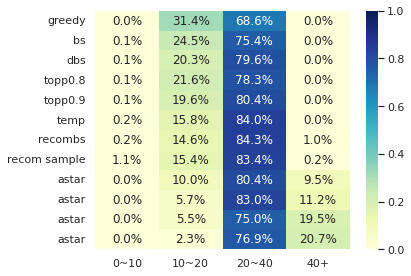

In [44]:
# length distribution heatmap
import numpy as np
import matplotlib.pyplot as plt

ratio_keys = ["ratio_10",'ratio_20','ratio_40','ratio_1000']
table = []
table_per = []
target_key = ratio_keys
print(" & ".join(target_key))
mnames = []
for d in data:
    outputs = []
    outputs_per = []
    mnames.append(d['model'])
    for des in target_key:
        v = d[des]
        outputs_per.append(v)
        v = float(v.strip()[:-1]) *0.01
        
        outputs.append(v)
    # print(" & ".join(outputs) + '')
    table.append(outputs)
    table_per.append(outputs_per)

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

fig, ax = plt.subplots()
ax = sns.heatmap(table, annot=table_per,vmax=1, fmt='s', yticklabels=mnames, xticklabels=['0~10','10~20','20~40','40+'], cmap="YlGnBu")
fig.tight_layout()

plt.savefig('len_distb.pdf')